# Kütüphaneleri import etme

In [794]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# her magazanın toplam satıs degerlendirmesi 

In [795]:
store_data = pd.read_csv('store_view.csv')

In [796]:
store_data.head()

,store,ürün_sayısı,toplam_ürün,ortalama_satıs,toplam_satıs
0,1,91300,2328150,47.268379,4315603
1,2,91300,2328150,67.033165,6120128
2,3,91300,2328150,59.530602,5435144
3,4,91300,2328150,54.902946,5012639
4,5,91300,2328150,39.770164,3631016


In [797]:
store_data.drop(['ürün_sayısı','toplam_ürün'],axis=1)

,store,ortalama_satıs,toplam_satıs
0,1,47.268379,4315603
1,2,67.033165,6120128
2,3,59.530602,5435144
3,4,54.902946,5012639
4,5,39.770164,3631016
5,6,39.733516,3627670
6,7,36.363735,3320009
7,8,64.142048,5856169
8,9,55.049025,5025976
9,10,58.709288,5360158


/home/tk/Masaüstü/buyılderskıtap/makine öğrenmesi/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='store', ylabel='ortalama_satıs'>

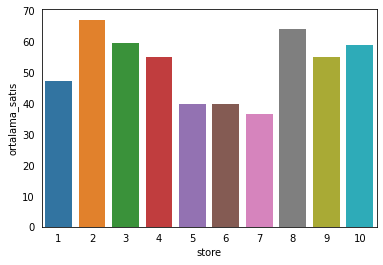

In [798]:
sns.barplot(store_data['store'],store_data['ortalama_satıs'])

# 2013 yılına ait satış zaman grafiği

In [799]:
date_parser = pd.to_datetime
sales_2013 = pd.read_csv("sales_2013_view.csv",date_parser=date_parser,infer_datetime_format=True)

In [800]:
sales_2013=sales_2013.drop(['ürün_sayısı','toplam_ürün'],axis=1)

In [801]:
sales_2013.head()

,date,ortalama_satıs,toplam_satıs
0,2013-01-02,27.356,13678
1,2013-01-03,28.976,14488
2,2013-01-04,31.354,15677
3,2013-01-05,32.474,16237
4,2013-01-06,34.582,17291


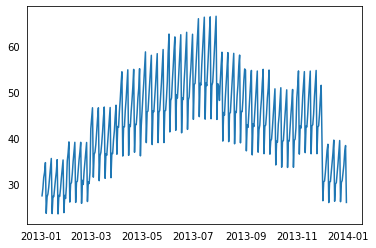

In [802]:
date = sales_2013['date']
date_time_2013 = list(map(lambda date: datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])), date))
sales_list_2013 = sales_2013['ortalama_satıs']
# tüm marketlerin toplam stoğu şeklinde
plt.plot(date_time_2013,sales_list_2013)

(array([21., 30., 34., 55., 52., 69., 42., 30., 18., 12.]),
 array([23.418 , 27.7194, 32.0208, 36.3222, 40.6236, 44.925 , 49.2264,
        53.5278, 57.8292, 62.1306, 66.432 ]),
 <BarContainer object of 10 artists>)

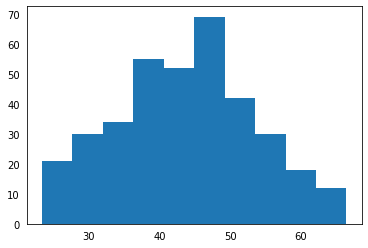

In [803]:
plt.hist((sales_list_2013))

# 2014 senesine ait stok analizi

In [804]:
date_parser = pd.to_datetime
sales_2014 = pd.read_csv("sales_2014_view.csv",date_parser=date_parser,infer_datetime_format=True)

In [805]:
sales_2014=sales_2014.drop(['ürün_sayısı','toplam_ürün'],axis=1)

In [806]:
sales_2014.head()

,date,ortalama_satıs,toplam_satıs
0,2014-01-02,34.066,17033
1,2014-01-03,35.492,17746
2,2014-01-04,38.368,19184
3,2014-01-05,40.364,20182
4,2014-01-06,26.876,13438


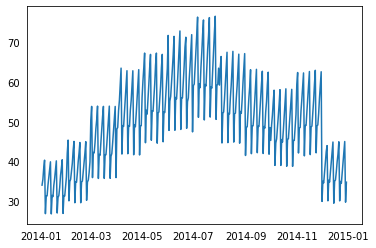

In [807]:
date = sales_2014['date']
date_time_2014 = list(map(lambda date: datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])), date))
sales_list_2014 = sales_2014['ortalama_satıs']
# tüm marketlerin toplam stoğu şeklinde
plt.plot(date_time_2014,sales_list_2014)

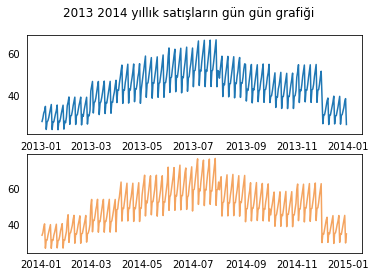

In [808]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('2013 2014 yıllık satışların gün gün grafiği')
ax1.plot(date_time_2013, sales_list_2013)
ax2.plot(date_time_2014, sales_list_2014)
ax2.get_lines()[0].set_color('sandybrown')

# tüm seneler grafikleri karşılaştırması

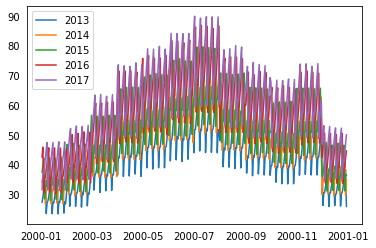

In [809]:
start_date = 2013
finish_date = 2017
for i in range(start_date,finish_date+1):
    date_parser = pd.to_datetime
    sales = pd.read_csv(f"sales_{i}_view.csv",date_parser=date_parser,infer_datetime_format=True)
    sales=sales.drop(['ürün_sayısı','toplam_ürün'],axis=1)
    date = sales['date']
    date_time = list(map(lambda date: datetime(2000,int(date.split('-')[1]), int(date.split('-')[2])), date))
    sales_list = sales['ortalama_satıs']
    # tüm marketlerin toplam stoğu şeklinde
    plt.plot(date_time,sales_list, label=f'{i}')
    plt.legend(loc="upper left")
plt.show()

# her yılın ay ay satışları

In [810]:
deneme = pd.read_csv(f"monthly_sales_2013.csv")
deneme.head()

,month,sum
0,2013-01-01 00:00:00+02,441208
1,2013-02-01 00:00:00+02,459417
2,2013-03-01 00:00:00+02,617382
3,2013-04-01 00:00:00+03,682274
4,2013-05-01 00:00:00+03,763242


#  Verinin stationary non stationary olma durumu analizi

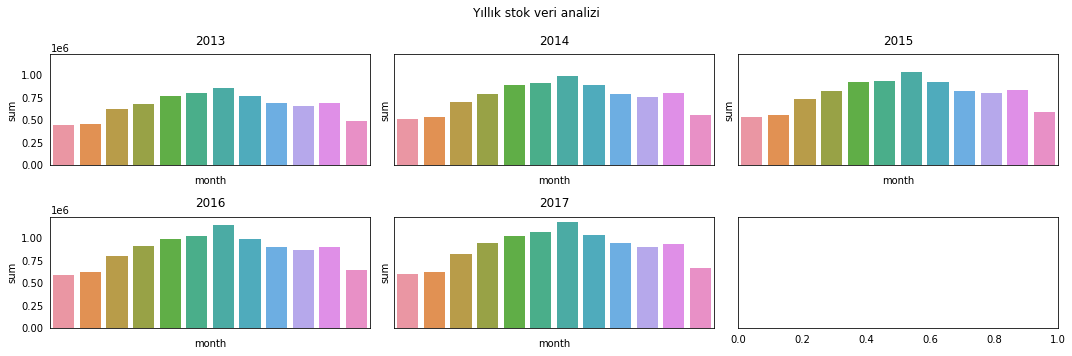

In [811]:
import seaborn as sns
start = 3
finish = 7
fig, axes = plt.subplots(2,3, figsize=(15, 5), sharey=True)

for i in range(start,finish+1):
    deneme = pd.read_csv(f"monthly_sales_201{i}.csv")
    row_idx = int((i-start)/3)
    column_idx = i%3

    sns.barplot(ax = axes[row_idx][column_idx], x=deneme['month'],y=deneme['sum'])    
    axes[row_idx][column_idx].set_title(f"201{i}")
    axes[row_idx][column_idx].set(xticklabels=[])
    fig.suptitle('Yıllık stok veri analizi')
plt.tight_layout()
plt.show()

dağılımı farklı veri kümeleri bulunmakta bu yüzden stokların aylık satışlarının grafik üzerinde belirli bir ağırlık etkisi bulunmaktadır. Buda tahmini etkilemektedir.

#  Bunun daha iyi kanıtı olarak Augmented-Dickey Fuller testi uygulanır

yıllık toplam satışa göre autokorelasyon uygulaması.   

In [812]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

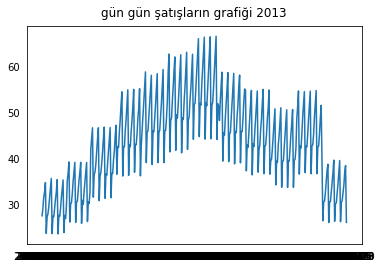

In [813]:
plt.plot(sales_2013['date'],sales_2013['ortalama_satıs'])
plt.title('gün gün şatışların grafiği 2013')
plt.show()

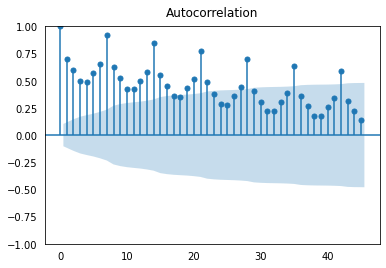

In [814]:
# Have some time series data (via pandas)
sales = sales_2013['ortalama_satıs']
# Select relevant data, index by Date
# Calculate the ACF (via statsmodel)
plot_acf(sales,lags=45)
# Show the data as a plot (via matplotlib)
plt.show()

her yedi günde 1 tane peak olması haftalık bir trend olması demektir.

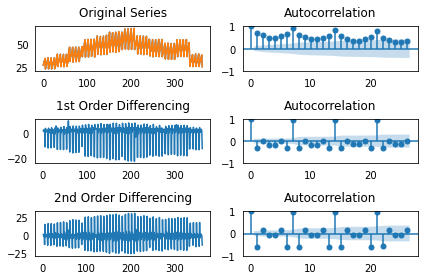

In [815]:
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(sales)
axes[0, 0].plot(sales)
axes[0, 0].set_title('Original Series')
plot_acf(sales, ax=axes[0, 1])# 1st Differencing
axes[1, 0].plot(sales.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(sales.diff().dropna(), ax=axes[1, 1])# 2nd Differencing
axes[2, 0].plot(sales.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sales.diff().diff().dropna(), ax=axes[2, 1])
plt.tight_layout()
#fig.show()
#fig.savefig("deneme.png")
#plt.close()

/home/tk/Masaüstü/buyılderskıtap/makine öğrenmesi/notebook/jupyterenv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


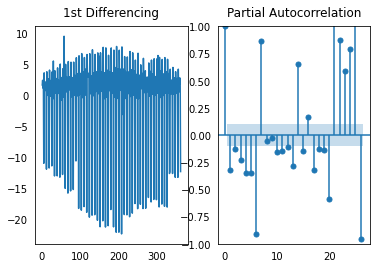

In [816]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sales.diff().dropna(), ax=axes[1])
plt.show()

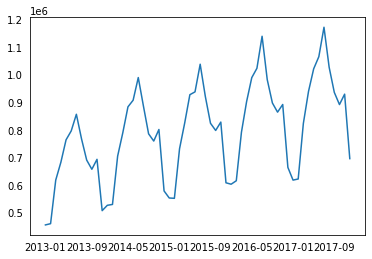

In [817]:
df = pd.read_csv('stock.csv',parse_dates=True, index_col='date')
df = pd.DataFrame(df.groupby(pd.to_datetime(df.index,utc=True).strftime('%Y-%m')).sum()['sales'])
df.columns=['sales']

fig,axes=plt.subplots(1,1)

axes.plot(df)
axes.xaxis.set_major_locator(MaxNLocator(10)) 

In [818]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

### Stationary mi non stationary mi?

In [819]:
df_testing = pd.DataFrame(np.log(df['sales']).diff())
adf_check(df_testing.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7675844597458092
p-value : 0.3966696686662111
Number of Lags Used : 11
Number of Observations Used : 47
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



Text(0.5, 1.0, 'Stationary time series.')

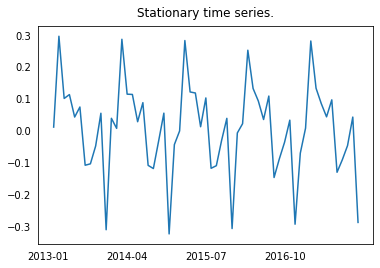

In [820]:
fig,axes=plt.subplots(1,1)

axes.plot(np.log(df['sales']).diff())
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title('Stationary time series.')

In [821]:
df_testing = pd.DataFrame(np.log(df['sales']).diff().diff(12))
adf_check(df_testing.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.224375184338331
p-value : 2.0714123542198042e-10
Number of Lags Used : 0
Number of Observations Used : 46
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Text(0.5, 1.0, 'Stationary time series.')

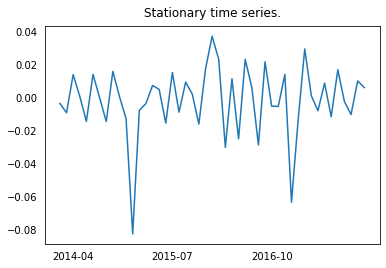

In [822]:
fig,axes=plt.subplots(1,1)

axes.plot(np.log(df['sales']).diff().diff(12))
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title('Stationary time series.')

# satılan 1.nesne ve 1.magaza gün gün o nesneyi satışı

In [823]:
item_1_store_1 = pd.read_csv('item_1_store_1.csv',parse_dates=True, index_col='date')
item_1_store_1.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


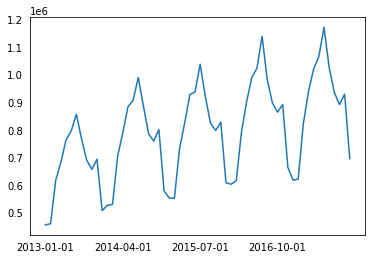

In [824]:
item_1_store_1 = pd.read_csv('item_1_store_1.csv',parse_dates=True, index_col='date')
item_1_store_1 = pd.DataFrame(df.groupby(pd.to_datetime(df.index,utc=True).strftime('%Y-%m-%d')).sum()['sales'])
df.columns=['sales']

fig,axes=plt.subplots(1,1)

axes.plot(item_1_store_1)
axes.xaxis.set_major_locator(MaxNLocator(5))

### Moving Average Gürültüsünün azaltılması

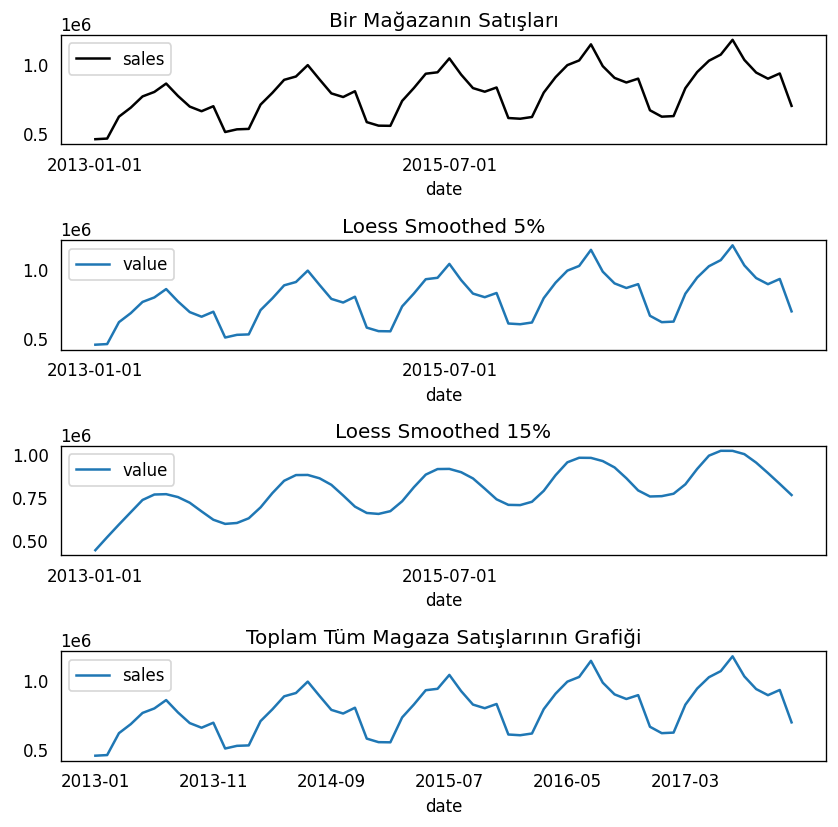

In [825]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = item_1_store_1
sales_monthly_all = pd.read_csv('stock.csv',parse_dates=True, index_col='date')
sales_monthly_all = pd.DataFrame(df.groupby(pd.to_datetime(df.index,utc=True).strftime('%Y-%m')).sum()['sales'])
    
# 1. Moving Average
df_ma = df_orig['sales'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig['sales'], np.arange(len(df_orig['sales'])), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig['sales'], np.arange(len(df_orig['sales'])), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=False, dpi=120)
df_orig.plot(ax=axes[0], color='k', title='Bir Mağazanın Satışları')
df_loess_5.plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15.plot(ax=axes[2], title='Loess Smoothed 15%')
sales_monthly_all.plot(ax=axes[3],title='Toplam Tüm Magaza Satışlarının Grafiği')

axes[0].xaxis.set_major_locator(MaxNLocator(5)) 
axes[1].xaxis.set_major_locator(MaxNLocator(5)) 
axes[2].xaxis.set_major_locator(MaxNLocator(5)) 

fig.tight_layout()

### TREND BULMA

In [826]:
df_loess_15.values[0]

array([443089.17413732])

Slope : 4919.613715578831
Intercept : 644947.1040558398


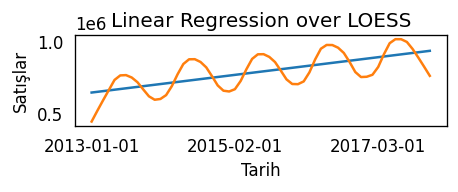

In [827]:
y = df_loess_15.value
x = np.arange(df_loess_15.index.size)
fit = np.polyfit(x,y, deg=1)

print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

#Linear regression plot
fig, axes = plt.subplots(1,1, figsize=(4, 1), sharex=True, dpi=120)
axes.plot(df_loess_15.index, fit_function(x))#Time series data plot
axes.plot(df_loess_15.index, y)
axes.xaxis.set_major_locator(MaxNLocator(3)) 

axes.set_xlabel('Tarih')
axes.set_ylabel('Satışlar')
axes.set_title('Linear Regression over LOESS')
plt.show()

# ARIMA ve SARIMAX modeli

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import plot_confusion_matrix

In [53]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [54]:
#read data
sales = pd.read_csv('sales_all_month.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
sales = sales.drop(['sum'],axis=1)

In [55]:
sales.head()

,avg
day,
2013-01-01,29.348645
2013-02-01,32.815500
2013-03-01,39.831097
2013-04-01,45.484933
2013-05-01,49.241419


In [56]:
sales.tail()

,avg
day,
2017-08-01,66.219548
2017-09-01,62.350867
2017-10-01,57.494194
2017-11-01,61.922467
2017-12-01,44.849677


### boş verilerin doldurulması

In [57]:
"""
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    
    #Compute the mean of corresponding seasonal periods
    #ts: 1D array-like of the time series
    #n: Seasonal window length of the time series
    
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")
"""
print()

In [58]:
#infer the frequency of the data
sales = sales.asfreq(pd.infer_freq(sales.index))

In [59]:
start_date = datetime(2013,1,1)
end_date = datetime(2017,12,31)
lim_sales = sales[start_date:end_date]

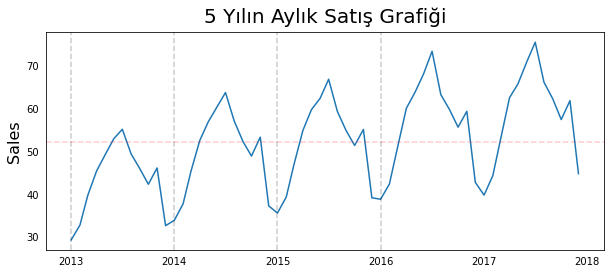

In [60]:
plt.figure(figsize=(10,4))
plt.plot(lim_sales)
plt.title('5 Yılın Aylık Satış Grafiği', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_sales['avg'].mean(), color='r', alpha=0.2, linestyle='--')

In [61]:
first_diff = lim_sales.diff()[1:]

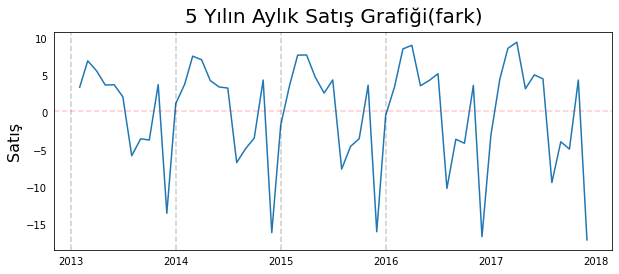

In [62]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('5 Yılın Aylık Satış Grafiği(fark)', fontsize=20)
plt.ylabel('Satış', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff['avg'].mean(), color='r', alpha=0.2, linestyle='--')

# ACF

<BarContainer object of 18 artists>

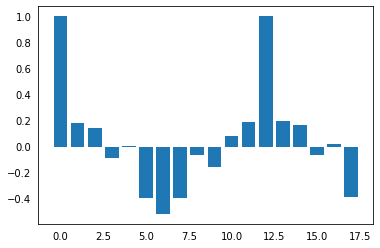

In [63]:
num_lags=18
acf_vals = acf(first_diff,num_lags)
acf_vals
plt.bar(range(num_lags), acf_vals[:num_lags])

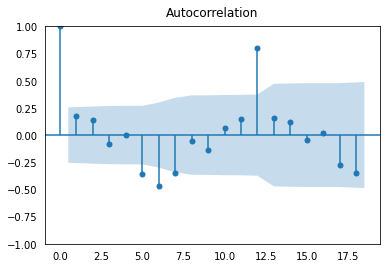

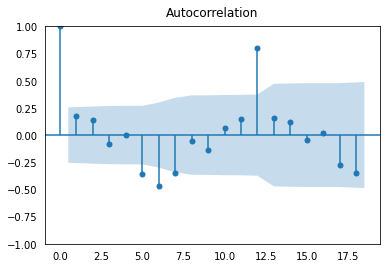

In [64]:
plot_acf(first_diff)

# PACF

<BarContainer object of 18 artists>

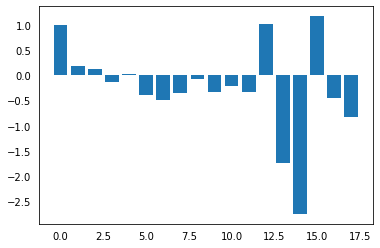

In [65]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

/home/tk/Masaüstü/buyılderskıtap/makine öğrenmesi/notebook/jupyterenv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


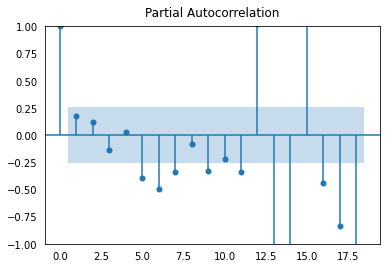

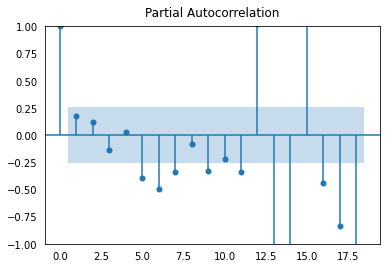

In [66]:
plot_pacf(first_diff)

### Lag analizi

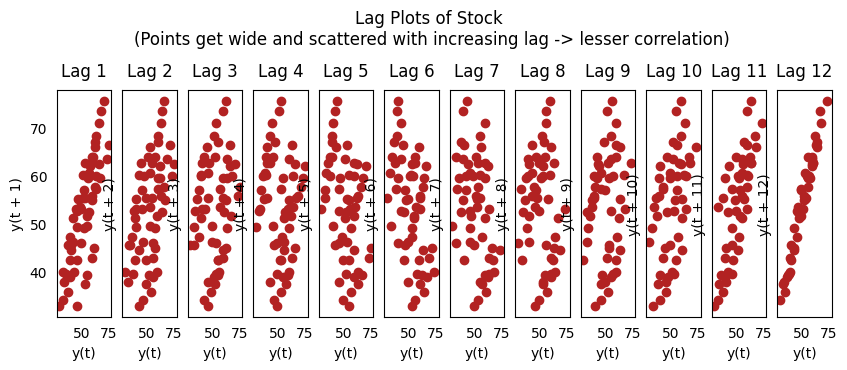

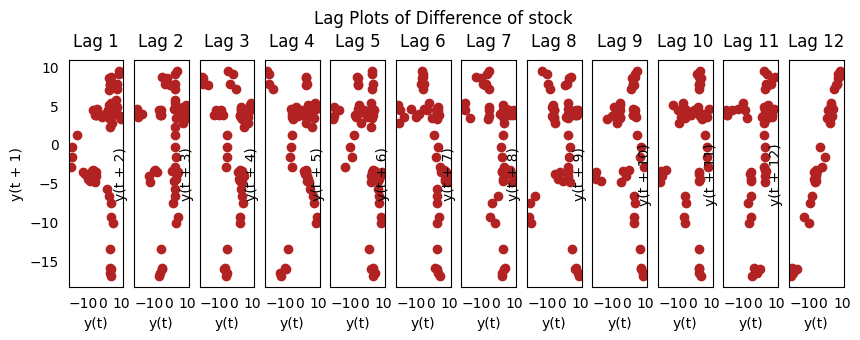

In [67]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = sales
a10 = first_diff

# Plot
fig, axes = plt.subplots(1, 12, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:12]):
    lag_plot(ss['avg'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Stock \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 12, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:12]):
    lag_plot(a10['avg'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Difference of stock', y=1.05)    
plt.show()

#### Based on PACF, we should start with a AR(4) process

## Scale Dataset

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(first_diff)

In [69]:
first_diff['avg'] = scaled_sales

### Get training and testing sets

In [70]:
train_end = datetime(2016,1,1)
test_end = datetime(2017,12,31)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

### Fit the SARIMA Model

In [71]:
my_order = (1,1,2) # ar katsayısı differ, ma katsayısı
my_seasonal_order = (1, 0, 1, 12)
# define model

model = ARIMA(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [72]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/home/tk/Masaüstü/buyılderskıtap/makine öğrenmesi/notebook/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 1.204291582107544


In [73]:
#summary of the model
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                avg   No. Observations:                   36
Model:             ARIMA(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                  40.033
Date:                            Sun, 19 Dec 2021   AIC                            -68.066
Time:                                    18:02:37   BIC                            -58.734
Sample:                                02-01-2013   HQIC                           -64.845
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8259      3.387     -0.244      0.807      -7.463       5.812
ma.L1         -0.1440      3.109   

### So the ARIMA(1,0,1) model is:,

#### $\hat{y_t} = -0.9884y_{t-1} + 0.9861y_{t-12} - 0.0138\varepsilon_{t-1} - 0.9861\varepsilon_{t-12} + 1.1763\varepsilon$ 

In [74]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [75]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date).to_frame('avg')
residuals = test_data - predictions

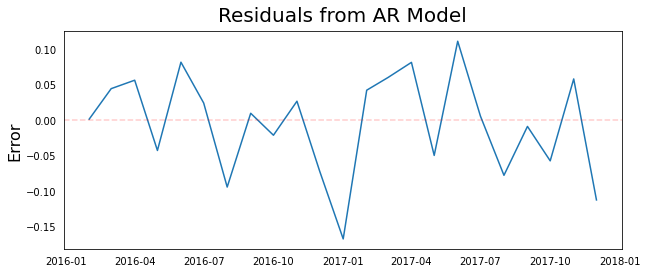

In [76]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

/tmp/ipykernel_2716/1158047897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['avg'] = scaler.inverse_transform(test_data)


Text(0, 0.5, 'Satış')

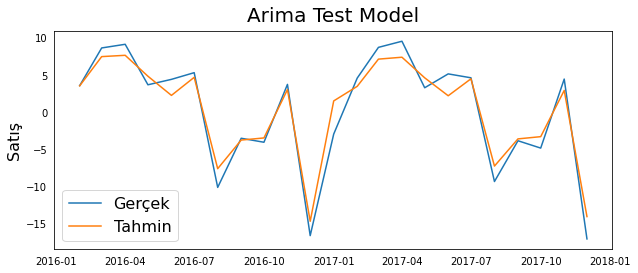

In [77]:
plt.figure(figsize=(10,4))
predictions['avg'] = scaler.inverse_transform(predictions)
test_data['avg'] = scaler.inverse_transform(test_data)
plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Gerçek', 'Tahmin'), fontsize=16)

plt.title('Arima Test Model', fontsize=20)
plt.ylabel('Satış', fontsize=16)

/tmp/ipykernel_2716/3421592072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['avg'] = scaler.inverse_transform(train_data)


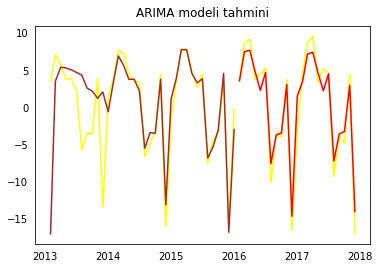

In [78]:
train_start_date = train_data.index[0]
train_end_date = train_data.index[-1]

# scale inverse
train_data['avg'] = scaler.inverse_transform(train_data)

train_data_predict = model_fit.predict(start=train_start_date, end=train_end_date).to_frame('avg')
train_data_predict['avg'] = scaler.inverse_transform(train_data_predict)

plt.plot(train_data,color='yellow')
plt.plot(test_data,color='yellow')
plt.plot(train_data_predict,color='brown')
plt.plot(predictions,color='red')
plt.title("ARIMA modeli tahmini")
plt.show()

In [79]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: avg    0.069116
dtype: float64


## Test Değerlendirmesi

In [82]:
y_pred = predictions['avg']
y_test = test_data['avg']
 
# # Mean Absolute Error (MAE)
MAE = np.mean(abs(y_pred - y_test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Median Absolute Error (MedAE)
MEDAE = np.median(abs(y_pred - y_test))
print('Median Absolute Error (MedAE): ' + str(np.round(MEDAE, 2)))

# Mean Squared Error (MSE)
MSE = np.square(np.subtract(y_pred, y_test)).mean()
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(np.mean(np.square(y_pred - y_test)))
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Median Absolute Percentage Error (MDAPE): ' + str(np.round(MDAPE, 2)) + ' %')

Mean Absolute Error (MAE): 1.51
Median Absolute Error (MedAE): 1.48
Mean Squared Error (MSE): 3.38
Root Mean Squared Error (RMSE): 1.84
Mean Absolute Percentage Error (MAPE): 27.3 %
Median Absolute Percentage Error (MDAPE): 18.7 %


### LSTM MODEL

In [83]:
# Setting up packages for data manipulation and machine learning
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2021-12-19 18:03:17.370908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 18:03:17.370957: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [84]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [85]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [86]:
#read data
sales = pd.read_csv('sales_all_month.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
sales = sales.drop(['sum'],axis=1)

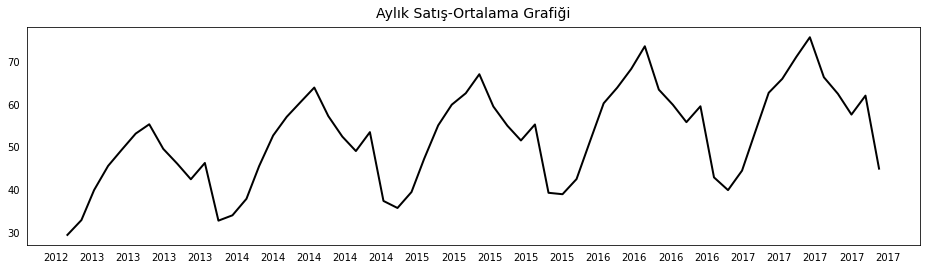

In [87]:
df = sales

# Visualizing the data
fig, ax1 = plt.subplots(figsize=(16, 4))
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.title("Aylık Satış-Ortalama Grafiği", fontsize=14)
plt.plot(df, color="black", linewidth=2.0)
plt.show()

In [88]:
dataset = sales.values

In [89]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [90]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("train size: ", len(train),"\ntest size: ", len(test))

train size:  40 
test size:  20


In [91]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [92]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [93]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### MODEL

In [94]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dense(4))
model.add(Dense(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2021-12-19 18:03:31.334388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 18:03:31.334443: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:03:31.334494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tk-HP-Laptop-15-db0xxx): /proc/driver/nvidia/version does not exist
2021-12-19 18:03:31.335077: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
38/38 - 3s - loss: 0.1572 - 3s/epoch - 80ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0589 - 117ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0354 - 137ms/epoch - 4ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0328 - 127ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0314 - 121ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0295 - 113ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0285 - 112ms/epoch - 3ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0277 - 133ms/epoch - 4ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0252 - 130ms/epoch - 3ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0240 - 125ms/epoch - 3ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0241 - 116ms/epoch - 3ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0216 - 109ms/epoch - 3ms/step
Epoch 13/100
38/38 - 0s - loss: 0.0205 - 119ms/epoch - 3ms/step
Epoch 14/100
38/38 - 0s - loss: 0.0203 - 117ms/epoch - 3ms/step
Epoch 15/100
38/38 - 0s - loss: 0.0194 - 129ms/epoch - 3ms/step
Epoch 16/100
38/38 - 0s - loss: 0.0181 - 119ms/epoc

In [95]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.81 RMSE
Test Score: 6.86 RMSE


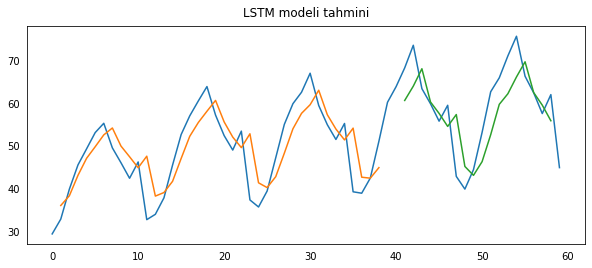

In [96]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(10,4))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("LSTM modeli tahmini")
plt.show()

## Test Değerlendirmesi

In [97]:

y_pred = testPredict[:,0]
y_test = testY[0]
 
# # Mean Absolute Error (MAE)
MAE = np.mean(abs(y_pred - y_test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Median Absolute Error (MedAE)
MEDAE = np.median(abs(y_pred - y_test))
print('Median Absolute Error (MedAE): ' + str(np.round(MEDAE, 2)))

# Mean Squared Error (MSE)
MSE = np.square(np.subtract(y_pred, y_test)).mean()
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(np.mean(np.square(y_pred - y_test)))
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Median Absolute Percentage Error (MDAPE): ' + str(np.round(MDAPE, 2)) + ' %')

Mean Absolute Error (MAE): 5.73
Median Absolute Error (MedAE): 5.7
Mean Squared Error (MSE): 46.99
Root Mean Squared Error (RMSE): 6.86
Mean Absolute Percentage Error (MAPE): 9.77 %
Median Absolute Percentage Error (MDAPE): 9.64 %
